## Observations and Insights 

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice = len(study_data["Mouse ID"].unique())
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
study_data[study_data[['Mouse ID', "Timepoint"]].duplicated() == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.drop_duplicates(subset =["Mouse ID","Timepoint"])
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(study_data["Mouse ID"].unique())
total_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = study_data.groupby(["Drug Regimen"])
mean = pd.DataFrame({"Mean":drug_group["Tumor Volume (mm3)"].mean()})
median = pd.DataFrame({"Median":drug_group["Tumor Volume (mm3)"].median()})
variance = pd.DataFrame({"Variance":drug_group["Tumor Volume (mm3)"].var()})
sd = pd.DataFrame({"Std Deviation":drug_group["Tumor Volume (mm3)"].std()})
sem = pd.DataFrame({"SEM":drug_group["Tumor Volume (mm3)"].sem()})

stats = pd.concat([mean, median, variance, sd, sem], axis = 1)
stats

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

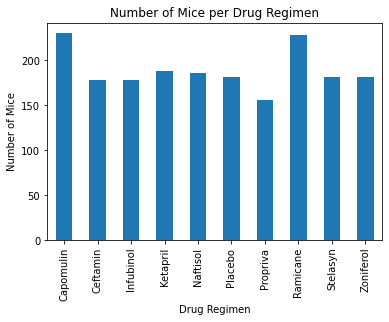

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts = drug_group.count()
counts_bar = drug_counts["Mouse ID"].plot(kind="bar", title = "Number of Mice per Drug Regimen")
counts_bar.set_ylabel("Number of Mice")

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

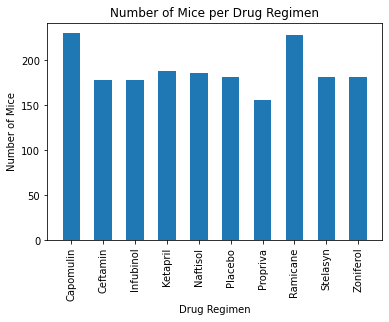

In [24]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(drug_group))
tick_locations = [value for value in x_axis]
drug_counts1 = drug_group["Mouse ID"].count()
plt.bar(x_axis, drug_counts1, width = 0.55)
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
          , rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

In [139]:
# Create a df with only unique mouse IDs and calculate gender percents
unique_mice = study_data.drop_duplicates(subset = ["Mouse ID"], ignore_index = True)
gender_counts = unique_mice["Sex"].value_counts()
gender_percents = gender_counts/total_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

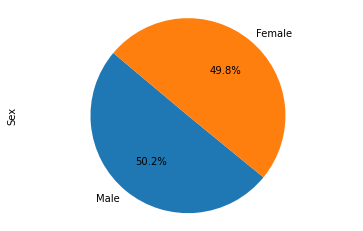

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = gender_percents.plot(kind="pie", autopct="%1.1f%%", startangle=140)
gender_pie.set_ylabel("Sex")
plt.axis("equal")

(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

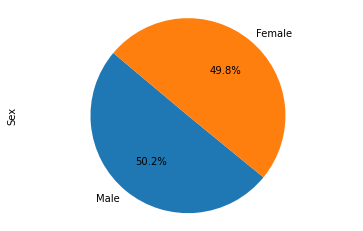

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_percents, labels=["Male", "Female"], autopct="%1.1f%%", startangle=140)
plt.ylabel("Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_group1 = study_data.loc[(study_data["Drug Regimen"] == "Capomulin")|
                            (study_data["Drug Regimen"] == "Ramicane") |
                            (study_data["Drug Regimen"] == "Infubinol")|
                            (study_data["Drug Regimen"] == "Ceftamin"),:]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = drug_group1.groupby(["Mouse ID"]).agg({"Timepoint":'max'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_df = pd.merge(final_timepoint, drug_group1, on=["Timepoint", "Mouse ID"], how="inner")
final_tumor_vol_df

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [267]:
# Put treatments into a list for a for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drugs:
    data = final_tumor_vol_df.loc[final_tumor_vol_df["Drug Regimen"] == drug]
    quartiles = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes and add subset
    tumor_vol_data.append(data["Tumor Volume (mm3)"])    
    
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol_df.loc[(final_tumor_vol_df["Tumor Volume (mm3)"] > upper_bound) | 
                                      (final_tumor_vol_df["Tumor Volume (mm3)"] < lower_bound),:]


[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

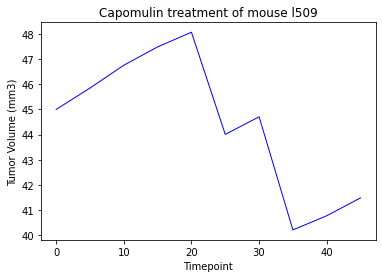

In [165]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = 'l509'
mouse_data = study_data.loc[study_data["Mouse ID"] == capomulin_mouse]
x_values = mouse_data["Timepoint"]
y_values = mouse_data["Tumor Volume (mm3)"]
plt.plot(x_values, y_values, linewidth = 1, color = 'blue')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {capomulin_mouse}")

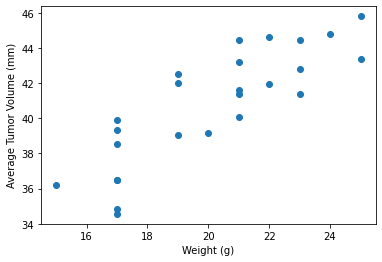

In [243]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = study_data.loc[study_data["Drug Regimen"] == "Capomulin"]
capo_tumor_vol = capomulin_data.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":'mean',
                                                           "Weight (g)":'unique'})
plt.scatter(capo_tumor_vol["Weight (g)"], capo_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm)")

## Correlation and Regression

The correlation coefficient is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm)')

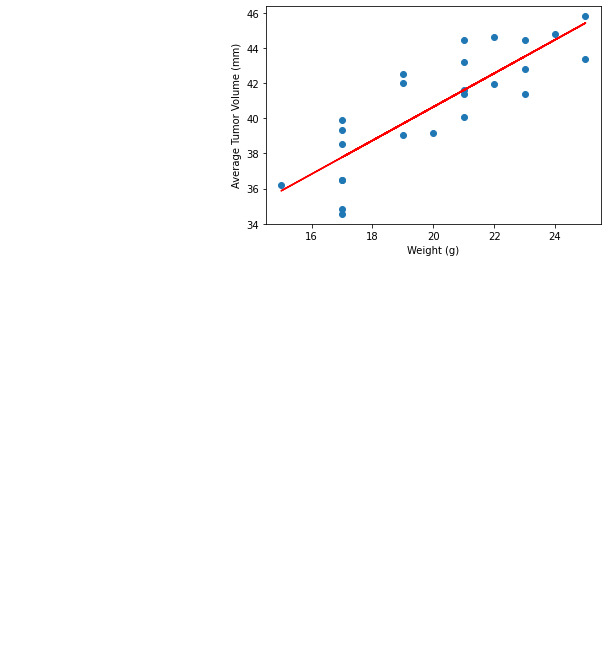

In [250]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
r1 = capo_tumor_vol.iloc[:,1].astype(float)
r2 = capo_tumor_vol.iloc[:,0].astype(float)
correlation = st.pearsonr(r1,r2)
correlation = round(correlation[0],2)
print(f"The correlation coefficient is {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(r1, r2)
regress_values = r1 * slope + intercept
line_eq = plt.plot(r1,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(capo_tumor_vol["Weight (g)"], capo_tumor_vol["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm)")